In [4]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.dpi'] = 100

In [5]:
# Data reading

data = pd.read_csv('fire.csv')

data.sample(10)

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight
29240,-12.04678,142.79027,305.8,0.38,0.59,2019-10-07,1624,N,VIIRS,n,1.0NRT,290.3,2.0,N
531332,-26.68733,147.13113,367.0,0.71,0.75,2019-12-12,254,N,VIIRS,h,1.0NRT,315.8,45.7,D
151912,-14.90967,127.20308,350.2,0.47,0.40,2019-11-04,448,N,VIIRS,l,1.0NRT,319.2,48.6,D
513004,-26.78467,147.43536,338.7,0.43,0.38,2019-12-09,1506,N,VIIRS,n,1.0NRT,298.0,3.4,N
857762,-36.03221,147.81104,318.1,0.41,0.61,2020-01-02,1418,N,VIIRS,n,1.0NRT,293.6,2.2,N
38104,-12.01083,132.87866,350.7,0.38,0.36,2019-10-09,436,N,VIIRS,n,1.0NRT,312.1,12.4,D
510511,-15.23495,126.01170,338.3,0.46,0.47,2019-12-09,530,N,VIIRS,n,1.0NRT,303.9,6.8,D
97224,-13.19448,134.35126,301.0,0.78,0.78,2019-10-21,1518,N,VIIRS,n,1.0NRT,289.3,0.8,N
617229,-31.48445,152.07652,356.2,0.40,0.44,2019-12-19,400,N,VIIRS,n,1.0NRT,310.6,5.9,D
641081,-28.58398,152.27939,353.3,0.42,0.37,2019-12-20,342,N,VIIRS,n,1.0NRT,309.1,15.7,D


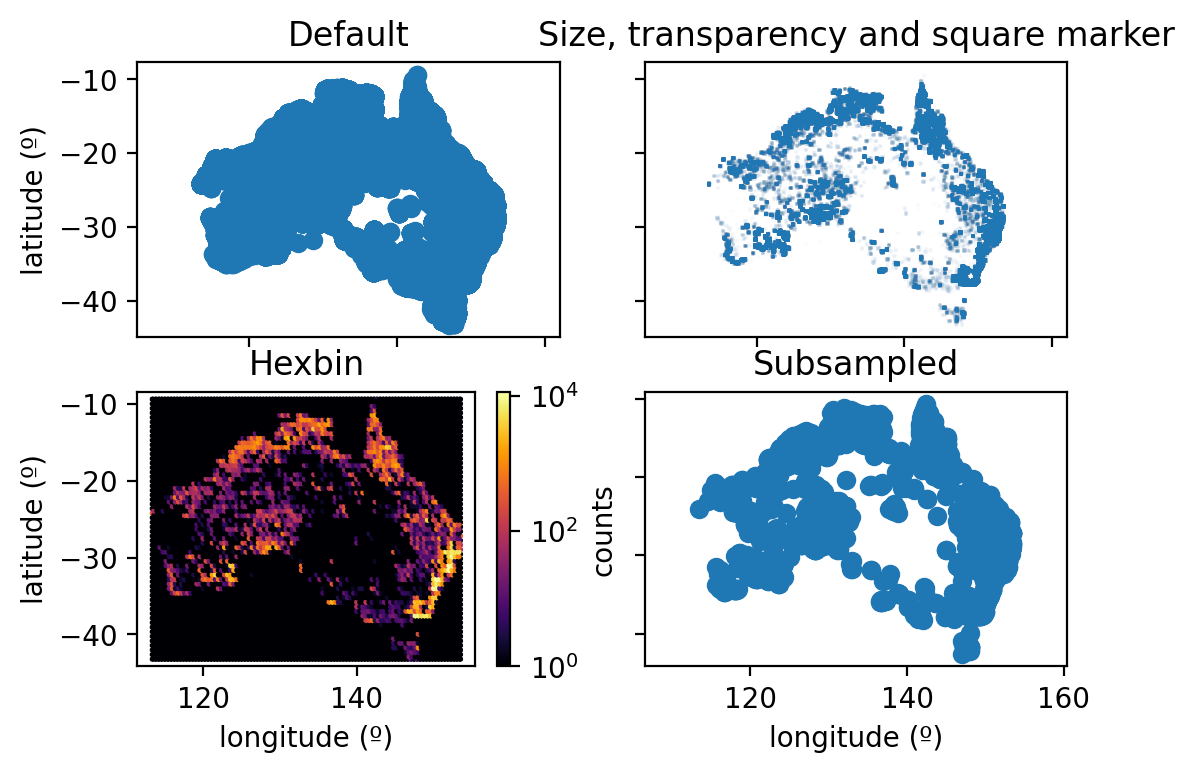

In [10]:
fig, ax = plt.subplots(2, 2)

# Common settings
for a in ax.flat:
    a.axis('equal')
    a.set_xlabel('longitude (º)')
    a.set_ylabel('latitude (º)')
    a.label_outer()

# Matplotlib defaults
ax[0, 0].scatter(data['longitude'], data['latitude'])
ax[0, 0].set_title('Default')

# Size, transparency and square marker
size = data['scan'] * data['track'] # The latter is just a scale factor to set the desired size
ax[0, 1].scatter(data['longitude'], data['latitude'], alpha=.01, s=size, marker='s')
ax[0, 1].set_title('Size, transparency and square marker')

# Hexbin
hb = ax[1, 0].hexbin(data['longitude'], data['latitude'], gridsize=100, bins='log', cmap='inferno')
fig.colorbar(hb, ax=ax[1, 0]).set_label('counts')
ax[1, 0].set_title('Hexbin')

# Subsampled
n_samples = len(data.index)
samples = np.random.choice(n_samples, int(n_samples/200))
ax[1, 1].scatter(data.loc[samples, 'longitude'], data.loc[samples, 'latitude'])
ax[1, 1].set_title('Subsampled')

plt.show()